# Notebook Demonstration

In [1]:
! pip install git+https://github.com/Julien2048/GANs.git --quiet
! git clone https://github.com/Julien2048/GANs

  Preparing metadata (setup.py) ... done
Cloning into 'GANs'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 160 (delta 74), reused 111 (delta 34), pack-reused 0
Receiving objects: 100% (160/160), 23.98 MiB | 15.59 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [10]:
from gan.gan import GANS
from gan.sampler import ODESampler, EulerMaruyamaSampler, EulerMaruyamaSamplerCorrector
from gan.score_based_model import ScoreNet
from gan.sde import SimpleSDE, VESDE, VPSDE
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Load DataSets

In [ ]:
process = GANS(
    model = ScoreNet,
    sde = SimpleSDE(), # SimpleSDE, VPSDE or VESDE
    data_loader = 'MNIST', # Choose between MNIST and FMNIST
    sampler = EulerMaruyamaSampler(), # Check sampler.py file
    device = 'cuda',
)

In [6]:
load = True # load = False to retrain the model
if load:
    process.load_model("SimpleSDE_100.pth")
else:
    process.train_model(n_epochs=50)
    process._plot_loss()

  0%|          | 0/1000 [00:00<?, ?it/s]

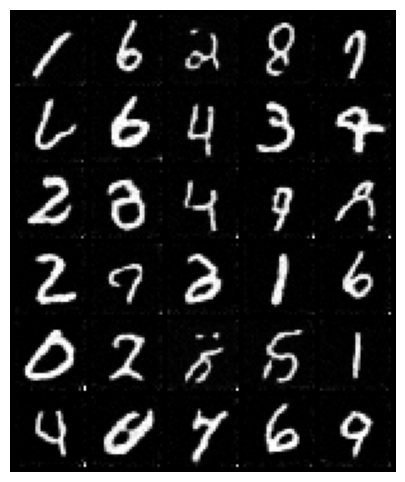

In [7]:
process.direct_sampling(30)
process.plot_samples()

## Tuning of Hyperparameters

### Sigma

100%|██████████| 469/469 [00:12<00:00, 38.41it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:11<00:00, 40.44it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:13<00:00, 35.55it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:13<00:00, 36.01it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:12<00:00, 38.71it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:12<00:00, 38.47it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

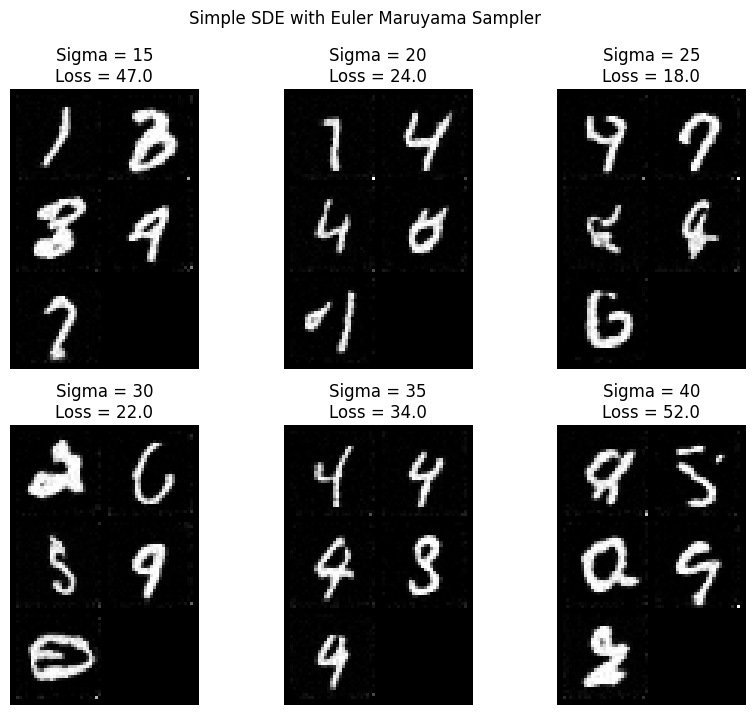

In [17]:
sigmas = [15, 20, 25, 30, 35, 40]
plt.figure(figsize=(10,8))
for sigma in sigmas:
    plt.subplot(2, int(len(sigmas)/2), sigmas.index(sigma)+1)
    process = GANS(
        model = ScoreNet,
        sde = SimpleSDE(sigma=sigma), # SimpleSDE, VPSDE or VESDE
        data_loader = 'MNIST', # Choose between MNIST and FMNIST
        sampler = EulerMaruyamaSampler(), # Check sampler.py file
        device = 'cuda'
        )
    process.load_model("SimpleSDE_100.pth")
    losses = []
    for x, _ in tqdm(process.data_loader):
        x = x.to("cuda")
        losses.append(process._loss_fn(x).cpu().detach().numpy())
    process.direct_sampling(5, save_evolution=False)
    process.plot_samples(grid=False, comparison=True, title=f"Sigma = {sigma}\nLoss = {np.mean(losses).round()}")

plt.suptitle("Simple SDE with Euler Maruyama Sampler")
plt.show()

### Steps

100%|██████████| 469/469 [00:12<00:00, 38.88it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:11<00:00, 39.42it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:12<00:00, 39.06it/s]


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:13<00:00, 35.65it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

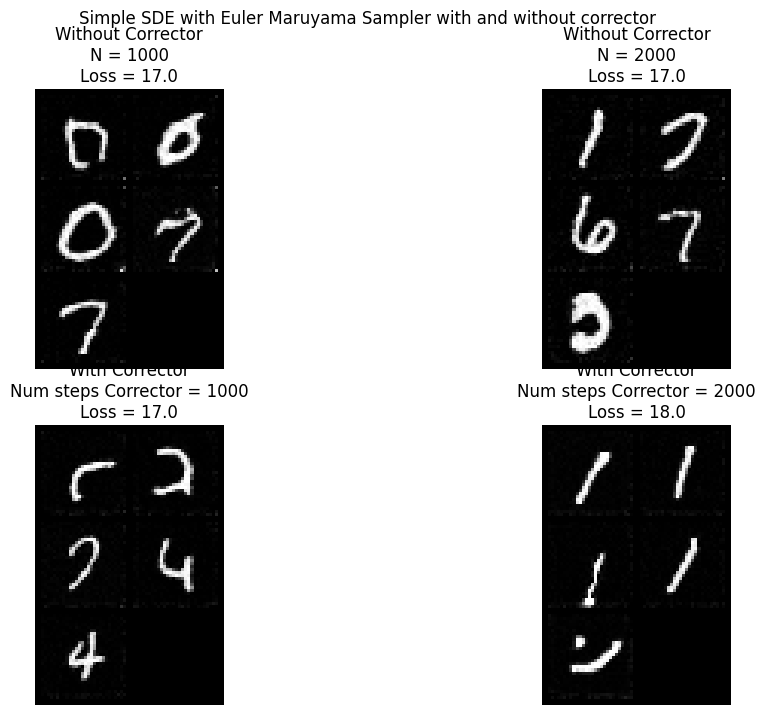

In [20]:
steps = [1000, 2000]
step_cors = [10, 100]
plt.figure(figsize=(12,8))
for i, step in enumerate(steps):
    plt.subplot(2, 2, steps.index(step)+1)
    process = GANS(
        model = ScoreNet,
        sde = SimpleSDE(sigma=25, N=step), # SimpleSDE, VPSDE or VESDE
        data_loader = 'MNIST', # Choose between MNIST and FMNIST
        sampler = EulerMaruyamaSampler(), # Check sampler.py file
        device = 'cuda'
        )
    process.load_model("SimpleSDE_100.pth")
    losses = []
    for x, _ in tqdm(process.data_loader):
        x = x.to("cuda")
        losses.append(process._loss_fn(x).cpu().detach().numpy())
    process.direct_sampling(5, save_evolution=False)
    process.plot_samples(grid=False, comparison=True, title=f"Without Corrector\nN = {step}\nLoss = {np.mean(losses).round()}")

    plt.subplot(2, 2, steps.index(step)+ 1 + 2)
    process = GANS(
        model = ScoreNet,
        sde = SimpleSDE(sigma=25, N=1000), # SimpleSDE, VPSDE or VESDE
        data_loader = 'MNIST', # Choose between MNIST and FMNIST
        sampler = EulerMaruyamaSamplerCorrector(num_steps_cor=step_cors[i]), # Check sampler.py file
        device = 'cuda'
        )
    process.load_model("SimpleSDE_100.pth")
    losses = []
    for x, _ in tqdm(process.data_loader):
        x = x.to("cuda")
        losses.append(process._loss_fn(x).cpu().detach().numpy())
    process.direct_sampling(5, save_evolution=False)
    process.plot_samples(grid=False, comparison=True, title=f"With Corrector\nNum steps Corrector = {step}\nLoss = {np.mean(losses).round()}")



plt.suptitle("Simple SDE with Euler Maruyama Sampler with and without corrector")
plt.show()